# Analysis 1:
 
 # Finding the number of attacks occured each year, The most occured type of attack, The most occured type of attack on the top 3 crime rate years, The most occured type of attck in 4 different year groups[(1970-1980),(1980-1990),(1990-2000),(2000-2009)], Most effective way that wounded maximum number of people 

# Finding the number of attacks occured each year

File load: Success


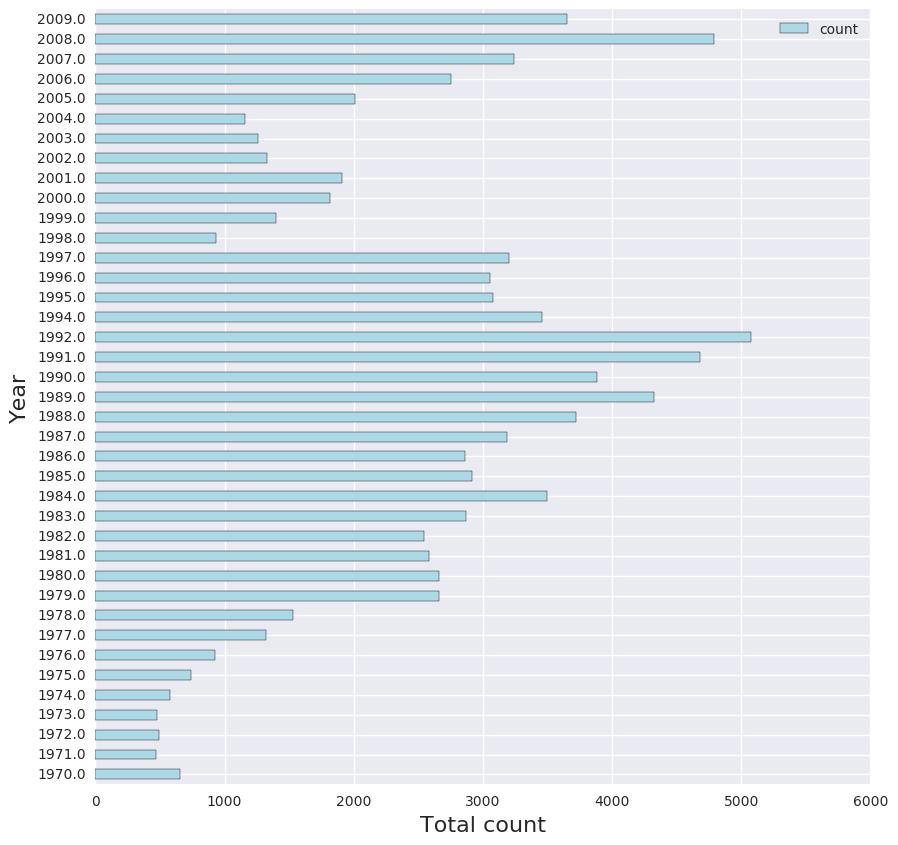

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import warnings
warnings.filterwarnings('ignore')
try:
    t_file = pd.read_csv('final/data/raw_data/globalterrorismdb_0616dist.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

Global_terror = t_file.copy()
Global_terror = Global_terror.rename(columns={'iyear':'year','attacktype1_txt':'attacktype','country_txt':'country_name','region_txt':'region_name'})
Global_terror = Global_terror[['year','country_name','region_name','attacktype','nkill','nwound']]
Global_terror['count'] = 1     #creating a new column with value 1 for calculations

# by year
by_year = (Global_terror.groupby('year').agg({'count':'sum'}))

by_year.plot(kind='barh', color='lightblue',figsize=[10,10])
plt.ylabel('Year', size=16)
plt.xlabel('Total count', size=16)
#plt.text('16826','42.5','16840',color='red', size=15)
#plt.text('14806','43.5','14806',color='red', size=15)
#plt.text('11990','41.5','11990',color='red', size=15)

1992 has been the most troublesome year, followed by 2008 and 1991.

# Finding the most occured type of attack

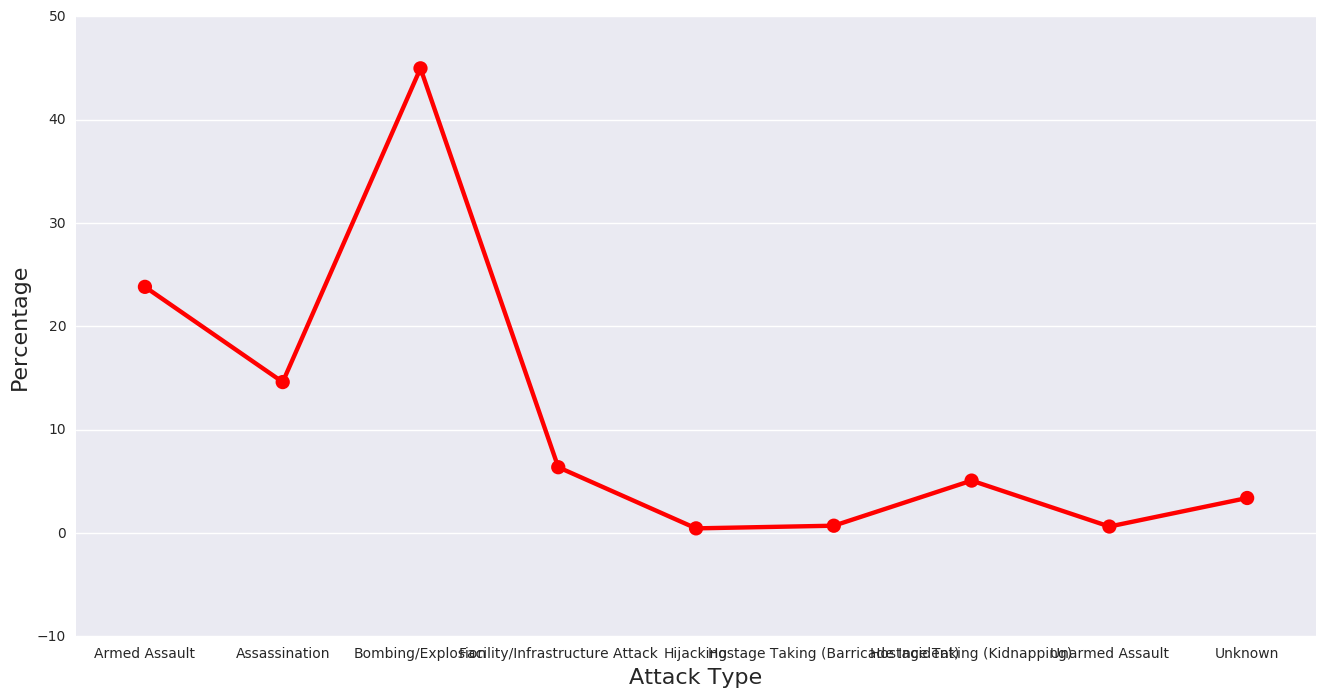

In [12]:
# Attack type
import seaborn as sns
attack_type = Global_terror.groupby('attacktype')['count'].count().reset_index()
total = attack_type['count'].sum()
attack_type['Percentage'] = attack_type.apply(lambda x : (x['count']/total) * 100, axis=1)

plt.figure(figsize=[16,8])
sns.pointplot(x='attacktype', y='Percentage', data=attack_type, color='red', rotation=30)
plt.xlabel('Attack Type', size=16)
plt.ylabel('Percentage', size=16)

Bombing/Explosion leads the list with around 48-50% of the total terrorist related cases over the years. Followed by Armed Assault with 25%.

# Finding the most occured type of attack on the top 3 crime rate years

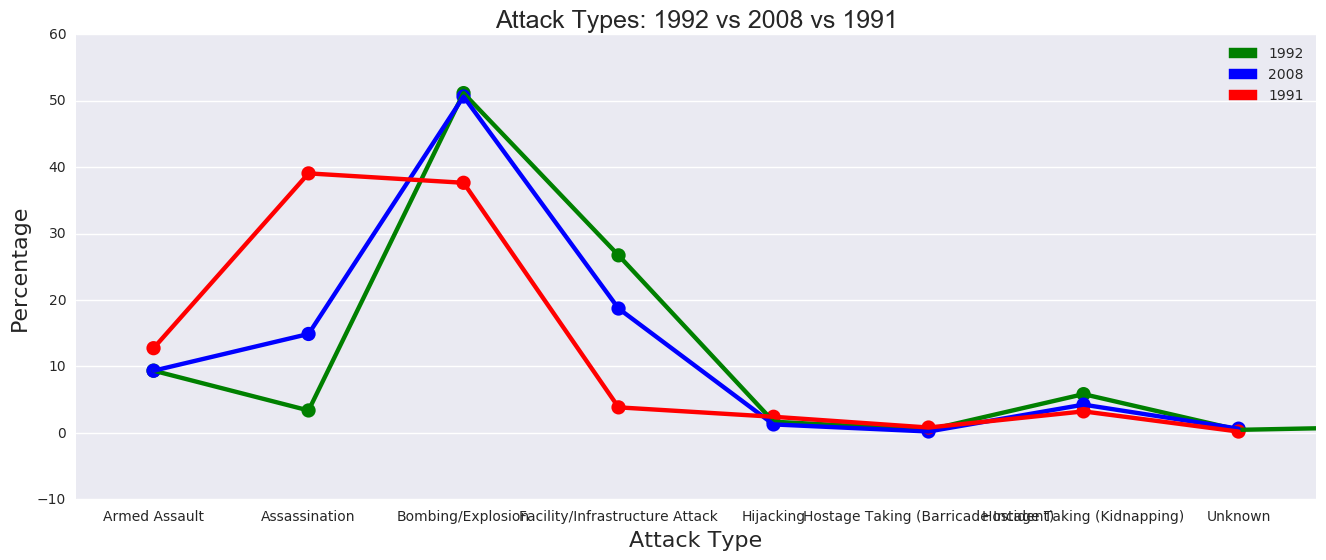

In [34]:
attack_2013 = Global_terror[Global_terror.year == 1970].groupby('attacktype')['count'].count().reset_index()
attack_2014 = Global_terror[Global_terror.year == 1971].groupby('attacktype')['count'].count().reset_index()
attack_2015 = Global_terror[Global_terror.year == 1972].groupby('attacktype')['count'].count().reset_index()

def attack_year(df,col_name):
    new_df = df.rename(columns={'count':'total_attacks'})
    total = new_df['total_attacks'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['total_attacks']/total)*100, axis=1)
    return new_df

new_attack2013 = attack_year(attack_2013,'attacktype')
new_attack2014 = attack_year(attack_2014,'attacktype')
new_attack2015 = attack_year(attack_2015,'attacktype')

plt.figure(figsize=[16,6])
sns.pointplot(x='attacktype', y='Percentage', data=new_attack2013, color='green')
sns.pointplot(x='attacktype', y='Percentage', data=new_attack2014, color='blue')
sns.pointplot(x='attacktype', y='Percentage', data=new_attack2015, color='red')
plt.xlabel('Attack Type', size=16)
plt.ylabel('Percentage', size=16)
plt.title('Attack Types: 1992 vs 2008 vs 1991', size=18)

import matplotlib.patches as mpat
gre = mpat.Patch(color='green', label='1992')
blue = mpat.Patch(color='blue', label='2008')
red = mpat.Patch(color='red', label='1991')
plt.legend(handles=[gre,blue, red])

# Finding the the most occured type of attck in 4 different year groups[(1970-1980),(1980-1990),(1990-2000),(2000-2009)]

In [6]:
def year_group(year):
    yr_grp=''
    if year < 1980:
        yr_grp = 'Group 1'
    elif year < 1990:
        yr_grp = 'Group 2'
    elif year < 2000:
        yr_grp = 'Group 3'
    else: 
        yr_grp = 'Group 4'
    return yr_grp

new_globalterror = Global_terror.copy()
new_globalterror['Group'] = new_globalterror.apply(lambda row: year_group(row['year']),axis=1)

group_1 = new_globalterror[new_globalterror.Group == 'Group 1'].groupby('attacktype')['count'].count().reset_index()
group_2 = new_globalterror[new_globalterror.Group == 'Group 2'].groupby('attacktype')['count'].count().reset_index()
group_3 = new_globalterror[new_globalterror.Group == 'Group 3'].groupby('attacktype')['count'].count().reset_index()
group_4 = new_globalterror[new_globalterror.Group == 'Group 4'].groupby('attacktype')['count'].count().reset_index()

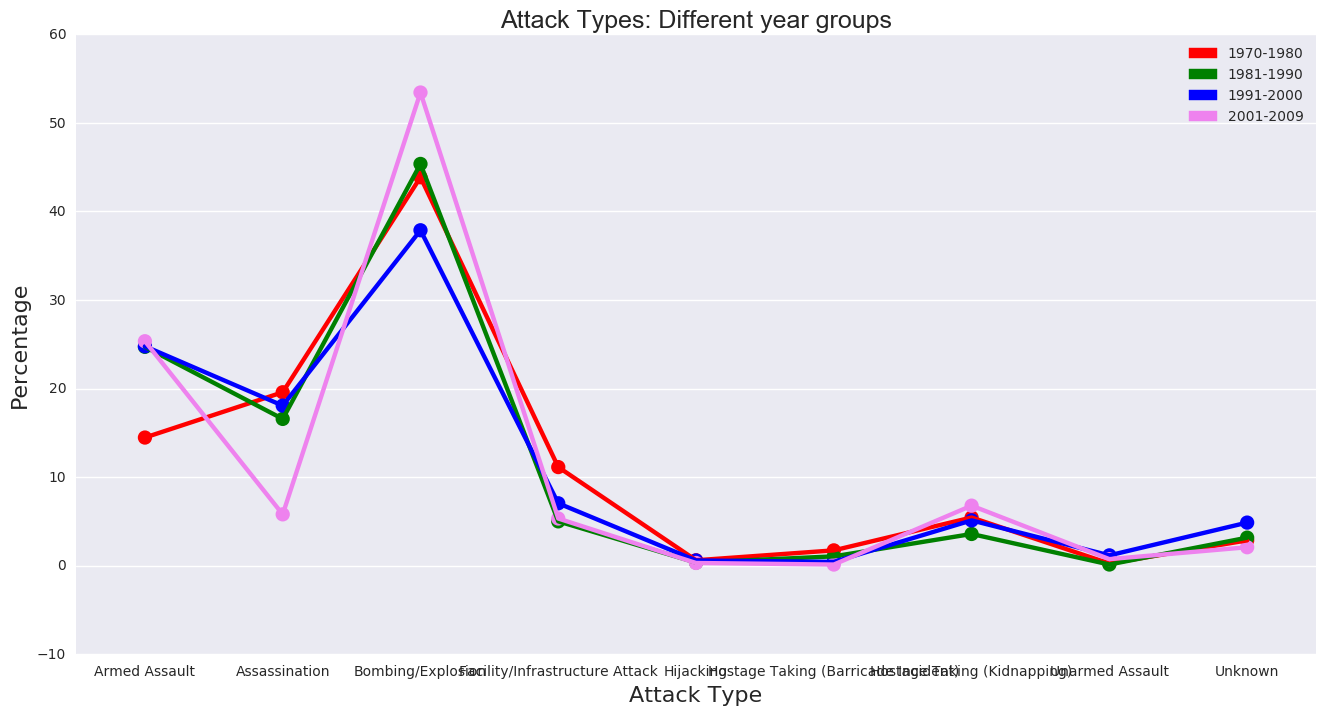

In [35]:
#using the previous function to calculate the percentage
import matplotlib.patches as mpat
new_grp1 = attack_year(group_1,'attacktype')
new_grp2 = attack_year(group_2,'attacktype')
new_grp3 = attack_year(group_3,'attacktype')
new_grp4 = attack_year(group_4,'attacktype')

plt.figure(figsize=[16,8])
sns.pointplot(x='attacktype',y='Percentage', data=new_grp1, color='red')
sns.pointplot(x='attacktype',y='Percentage', data=new_grp2, color='green')
sns.pointplot(x='attacktype',y='Percentage', data=new_grp3, color='blue')
sns.pointplot(x='attacktype',y='Percentage', data=new_grp4, color='violet')

plt.xlabel('Attack Type', size=16)
plt.ylabel('Percentage', size=16)
plt.title('Attack Types: Different year groups', size=18)

red_l = mpat.Patch(color='red', label='1970-1980')
gre_l = mpat.Patch(color='green', label='1981-1990')
blue_l = mpat.Patch(color='blue', label='1991-2000')
vio_l = mpat.Patch(color='violet', label='2001-2009')
plt.legend(handles=[red_l,gre_l,blue_l,vio_l])

# Finding the most effective way that wounded maximum number of people 

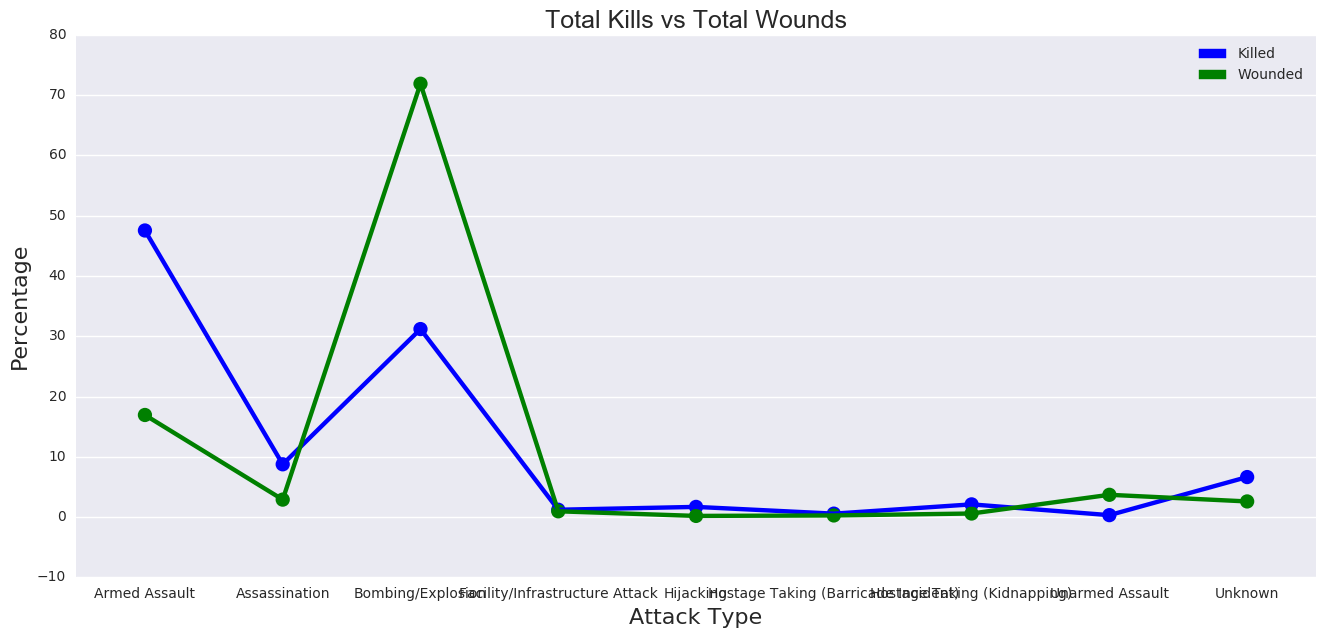

In [9]:
# Which attack type has been most effective - w.r.t number of kills and wounds
num_kills = Global_terror.groupby('attacktype')['nkill'].sum().reset_index()
num_wound = Global_terror.groupby('attacktype')['nwound'].sum().reset_index()

def attack_kills(df, col_name):
    new_df = df.rename(columns={'nkill':'kill_count'})
    total = new_df['kill_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['kill_count']/total)*100, axis=1)
    return new_df

def attack_wound(df,col_name):
    new_df = df.rename(columns={'nwound':'wound_count'})
    total = new_df['wound_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['wound_count']/total)*100, axis=1)
    return new_df
    
new_kills = attack_kills(num_kills,'attacktype')
new_wound = attack_wound(num_wound,'attacktype')

plt.figure(figsize=[16,7])
sns.pointplot(x='attacktype', y='Percentage', data=new_kills, color='blue')
sns.pointplot(x='attacktype', y='Percentage', data=new_wound, color='green')
plt.xlabel('Attack Type', size=16)
plt.ylabel('Percentage', size=16)
plt.title('Total Kills vs Total Wounds', size=18)

gre_lab = mpat.Patch(color='green', label = 'Wounded')
blue_lab = mpat.Patch(color='blue', label = 'Killed')
plt.legend(handles=[blue_lab,gre_lab])

As we saw in the previous topic. bombing/explosions was the highest form of attack, followed by armed assault. But this is not the case when it comes to number of people killed. Armed assault clearly takes the lead killing 42% of the total people, whereas bombing/explosions killed 38%.
In case of people getting wounded, bombing/explosions left 75% of total people wounded, whereas armed assault with 15%.
Conclusion: Most effective way that killed maximum number of people --> Armed Assault [42%] Most effective way that wounded maximum number of people --> Bombing/Explosions [75%]

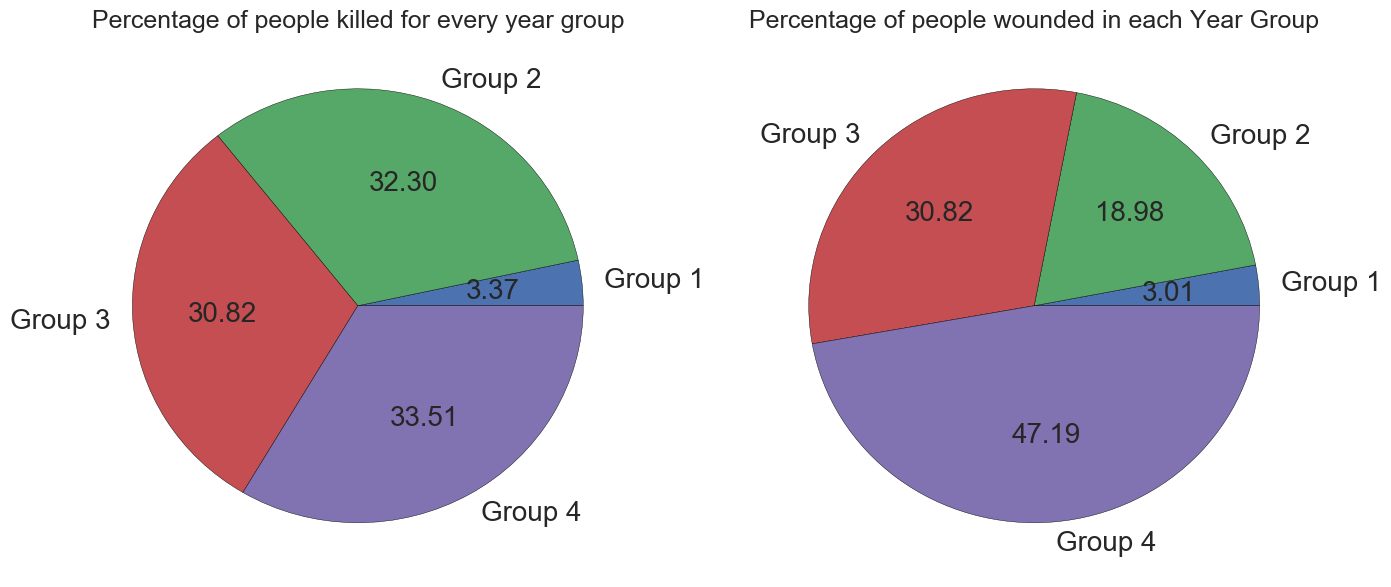

In [33]:
# Killed & Wounded --> w.r.t Year Groups
x_kill = new_globalterror.groupby('Group')['nkill'].sum()
y_wound = new_globalterror.groupby('Group')['nwound'].sum()


plt.figure(figsize=[16,7])
plt.subplot(121)
x_kill.plot.pie(subplots=True, autopct = '%.2f', figsize=[6,6], fontsize=20)
plt.ylabel("")
plt.title("Percentage of people killed for every year group", size=18)

plt.subplot(122)
y_wound.plot.pie(subplots=True, autopct = '%.2f', figsize=[6,6], fontsize=20)
plt.ylabel("")
plt.title("Percentage of people wounded in each Year Group", size=18)

The pie chart clearly depicts how Group 4 [2001-2009] dominates in both killed and wounded.